<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Keras/KerasDemoCreditCardChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
# or do from gdrive
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 87.5MB/s]


In [6]:
! unzip credit-card-customer-churn-prediction.zip

Archive:  credit-card-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 14)

In [11]:
import numpy as np


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isna().values.any()

False

In [15]:
df.duplicated().sum()

0

In [17]:
pd.Series([True, False, True, True]).sum()

3

In [18]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Nominal Encoding

In [25]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Scaling the values

In [27]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
X_train.shape

(8000, 11)

In [30]:
X_test.shape

(2000, 11)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
! pip install tensorflow

In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

### Now after creating model, we start to add layers to it.

In [59]:
# adding layers to model via add() function
# Dense is used to create dense network of perceptrons
# Dense(no.of nodes, activation_function, no.of inputs)

# original
# model.add(Dense(3, activation="sigmoid", input_dim=11))

# optimizations
model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))

# adding output layer
# Dense(no.of nodes, activationFunction)

model.add(Dense(1, activation="sigmoid"))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


## This is how model looks

<a href="https://ibb.co/TgHvw5s"><img src="https://i.ibb.co/TgHvw5s/11-3-1nn-drawio.png" alt="11-3-1nn-drawio" border="0" height="350" width="400"></a>

Compiling the model

In [61]:
# binary_crossentropy means log loss

In [62]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [72]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
# use of validation split parameter
# since in our model compilation, we set metrics = accuracy
# now here our model will do prediction on 80% data, and calculate loss and tell accuracy
# on remaining 20% data 

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8652 - val_loss: 0.3488 - val_accuracy: 0.8456
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8653 - val_loss: 0.3459 - val_accuracy: 0.8544
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8661 - val_loss: 0.3449 - val_accuracy: 0.8537
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8648 - val_loss: 0.3470 - val_accuracy: 0.8475
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8680 - val_loss: 0.3454 - val_accuracy: 0.8550
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8653 - val_loss: 0.3457 - val_accuracy: 0.8494
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8645 - val_loss: 0.3463 - val_accuracy: 0.8500

### To get weights

### 33 weights of first layer

In [44]:
# model.layer[layer_number].get_weights()

In [ ]:
model.layers[0].get_weights()

In [ ]:
model.layers[1].get_weights()

In [66]:
model.layers[2].get_weights()

[array([[ 0.923564  ],
        [-0.67183125],
        [-0.91584367],
        [-0.59455395],
        [ 0.4963145 ],
        [-0.6254339 ],
        [-0.8707797 ],
        [ 0.9312208 ],
        [ 0.49271333],
        [ 1.1630143 ],
        [ 0.75592905]], dtype=float32), array([-0.17589249], dtype=float32)]

In [67]:
model.predict(X_test_scaled)

array([[0.02097479],
       [0.05903342],
       [0.05117548],
       ...,
       [0.00894868],
       [0.04929239],
       [0.2252425 ]], dtype=float32)

Since we are using sigmoid, we get probabilites



we have to decide a threshold to decide if output is 0 or 1

like 0.5 is a threshold , values below 0.5 will be 0 and above it will be 1.

To get true optimal value of threshold, we have to do test like Roc Aoc curve, etc

In [68]:
# for now let's take theshold 0.5

y_log = model.predict(X_test_scaled)

# np.where(if condition, then , else)
y_prob = np.where(y_log>0.5, 1, 0)

In [69]:
y_prob

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [70]:
y_prob.shape

(2000, 1)

In [71]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_prob))

0.8665


In [51]:
# optimization
# 1. increase epochs
# 2. activation function = ReLu
# 3. increase nodes in hidden layer
# 4. Increase no. of layers


In [73]:
import matplotlib.pyplot as plt

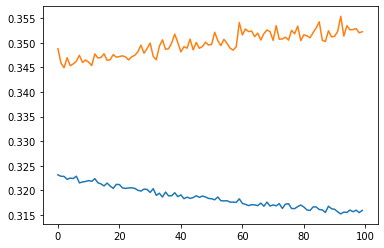

In [76]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

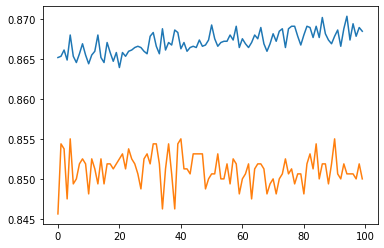

In [77]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [74]:
history.history

{'accuracy': [0.8651562333106995,
  0.8653125166893005,
  0.8660937547683716,
  0.8648437261581421,
  0.867968738079071,
  0.8653125166893005,
  0.8645312786102295,
  0.8656250238418579,
  0.8668749928474426,
  0.8654687404632568,
  0.8643749952316284,
  0.8654687404632568,
  0.8659374713897705,
  0.867968738079071,
  0.8651562333106995,
  0.8645312786102295,
  0.8670312762260437,
  0.8657812476158142,
  0.8646875023841858,
  0.8657812476158142,
  0.8639062643051147,
  0.8657812476158142,
  0.8653125166893005,
  0.8659374713897705,
  0.8660937547683716,
  0.866406261920929,
  0.8665624856948853,
  0.866406261920929,
  0.8659374713897705,
  0.8656250238418579,
  0.8678125143051147,
  0.8682812452316284,
  0.8665624856948853,
  0.8656250238418579,
  0.8687499761581421,
  0.8660937547683716,
  0.8670312762260437,
  0.8667187690734863,
  0.8685937523841858,
  0.8682812452316284,
  0.8662499785423279,
  0.8670312762260437,
  0.8659374713897705,
  0.866406261920929,
  0.8665624856948853,
  0